# DỰ ĐOÁN CHẤT LƯỢNG RƯỢU (WINE QUALITY PREDICTION)

## 1. Tổng quan về Bài toán

Mục tiêu của dự án này là xây dựng một mô hình học máy có khả năng **dự đoán chất lượng rượu vang** dựa trên các đặc trưng hóa học và vật lý của nó.

Để đơn giản hóa và tập trung vào việc phân loại, bài toán ban đầu (dự đoán điểm chất lượng từ 3 đến 8) đã được chuyển đổi thành một bài toán **Phân loại Nhị phân (Binary Classification)**:

**Nhãn 1 - Good (Ngon):** Rượu có chất lượng từ 7 trở lên (Quality >= 6.5).
**Nhãn 0 - Bad (Chưa ngon):** Rượu có chất lượng thấp hơn (Quality < 6.5).

## 2. Các Đặc trưng Hóa học và Vật lý (Features)

Dữ liệu đầu vào bao gồm 11 thông số quan trọng, đóng vai trò là các đặc trưng (features) để dự đoán chất lượng rượu:

1.  **Fixed Acidity** (Độ axit cố định)
2.  **Volatile Acidity** (Độ axit dễ bay hơi)
3.  **Citric Acid** (Axit citric)
4.  **Residual Sugar** (Lượng đường dư)
5.  **Chlorides** (Clorua)
6.  **Free Sulfur Dioxide** (Lưu huỳnh dioxide tự do)
7.  **Total Sulfur Dioxide** (Tổng lưu huỳnh dioxide)
8.  **Density** (Mật độ)
9.  **pH** (Độ pH)
10. **Sulphates** (Sulphat)
11. **Alcohol** (Độ cồn)

## 3. Các Mô hình Học máy (Models)

Dự án này sử dụng ba mô hình phân loại chính, thuộc thư viện Scikit-learn (Sklearn), để so sánh hiệu suất và tìm ra mô hình tối ưu nhất cho bài toán dự đoán chất lượng rượu:

* **K-Nearest Neighbors Classifier (K-NN/sknn):** Mô hình phân loại dựa trên khoảng cách.
* **Support Vector Machine (SVM):** Mô hình phân loại mạnh mẽ, đặc biệt hiệu quả trong không gian có chiều dữ liệu cao.
* **Random Forest Classifier:** Mô hình học máy dựa trên tập hợp cây quyết định, giúp giảm thiểu hiện tượng quá khớp (overfitting).

In [55]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix, 
    classification_report,
    roc_curve,
    auc,
)
from imblearn.over_sampling import SMOTE

## 2. Tải và Khám phá dữ liệu ban đầu (Data Loading)

In [56]:
df = pd.read_csv('data/WineQT.csv')
print(f"Kích thước dữ liệu: {df.shape}")
print(f"Số mẫu: {df.shape[0]}, Số cột: {df.shape[1]}")

display(df.head())

Kích thước dữ liệu: (1599, 12)
Số mẫu: 1599, Số cột: 12


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [57]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [58]:
print("Thống kê mô tả các biến số:")
display(df.describe())

Thống kê mô tả các biến số:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Phân bố nhãn chất lượng rượu:
quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64

Nhận xét: Dữ liệu tập trung, có sự mất cân bằng nhẹ.


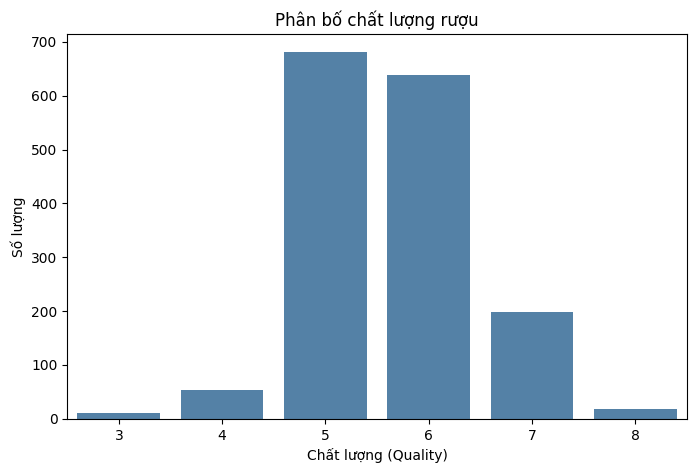

In [59]:
print("Phân bố nhãn chất lượng rượu:")
quality_counts = df['quality'].value_counts().sort_index()
print(quality_counts)
print(f"\nNhận xét: Dữ liệu tập trung, có sự mất cân bằng nhẹ.")

plt.figure(figsize=(8, 5))
sns.barplot(x=quality_counts.index, y=quality_counts.values, color='steelblue')
plt.title('Phân bố chất lượng rượu')
plt.xlabel('Chất lượng (Quality)')
plt.ylabel('Số lượng')
plt.show()

## 3. Tiền xử lý dữ liệu (Data Preprocessing)

### 3.1 Kiểm tra và xử lý giá trị thiếu (Missing Values)

In [60]:
print("Kiểm tra giá trị thiếu:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])
if missing_values.sum() == 0:
    print("\n✓ Tuyệt vời! Dữ liệu không có giá trị thiếu.")
else:
    print("\n⚠ Phát hiện giá trị thiếu, tiến hành xử lý...")
    df.fillna(df.median(), inplace=True)
    print("✓ Đã xử lý giá trị thiếu bằng giá trị median.")


Kiểm tra giá trị thiếu:
Series([], dtype: int64)

✓ Tuyệt vời! Dữ liệu không có giá trị thiếu.


### 3.2 Chuyển đổi Biến mục tiêu (Target Variable)
Chúng ta sẽ chuyển bài toán từ dự đoán điểm số (Regression/Multiclass) sang phân loại nhị phân (Binary Classification).

**Quyết định ngưỡng (Thresholding):**
- **Ngưỡng (Tối ưu):** `quality >= 6.5` (tức là 7, 8). 
  - **Good (1):** Là các chai rượu có điểm 7 trở lên (quality >= 7).
  - **Bad (0):** Các chai còn lại (quality <= 6).

In [61]:
df['quality_binary'] = df['quality'].apply(lambda x: 1 if x >= 6.5 else 0)
print("Phân bố nhãn nhị phân (Threshold >= 6.5):")
print(df["quality_binary"].value_counts())

Phân bố nhãn nhị phân (Threshold >= 6.5):
quality_binary
0    1382
1     217
Name: count, dtype: int64


### 3.3 Chia tập Train/Test
**Lý do chọn `test_size=0.2` (80/20):**
- Đảm bảo tập train đủ lớn để mô hình học tốt (80%).
- Tập test đủ lớn để đánh giá đáng tin cậy (20%).
- Tỷ lệ 80/20 là chuẩn phổ biến trong Machine Learning.

In [62]:
X = df.drop(['quality', 'quality_binary'], axis=1)
y = df['quality_binary']

print(f"\n📊 Thông tin dữ liệu:")
print(f"   • Số features: {X.shape[1]}")
print(f"   • Số mẫu: {X.shape[0]}")

print(f"\n📝 Danh sách features ({len(X.columns)} cột):")
for i, col in enumerate(X.columns, 1):
    print(f"   {i:2d}. {col}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTrain set: {X_train.shape[0]} mẫu ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set:  {X_test.shape[0]} mẫu ({X_test.shape[0]/len(X)*100:.1f}%)")


📊 Thông tin dữ liệu:
   • Số features: 11
   • Số mẫu: 1599

📝 Danh sách features (11 cột):
    1. fixed acidity
    2. volatile acidity
    3. citric acid
    4. residual sugar
    5. chlorides
    6. free sulfur dioxide
    7. total sulfur dioxide
    8. density
    9. pH
   10. sulphates
   11. alcohol

Train set: 1279 mẫu (80.0%)
Test set:  320 mẫu (20.0%)


### 3.4 Kiểm tra outlier

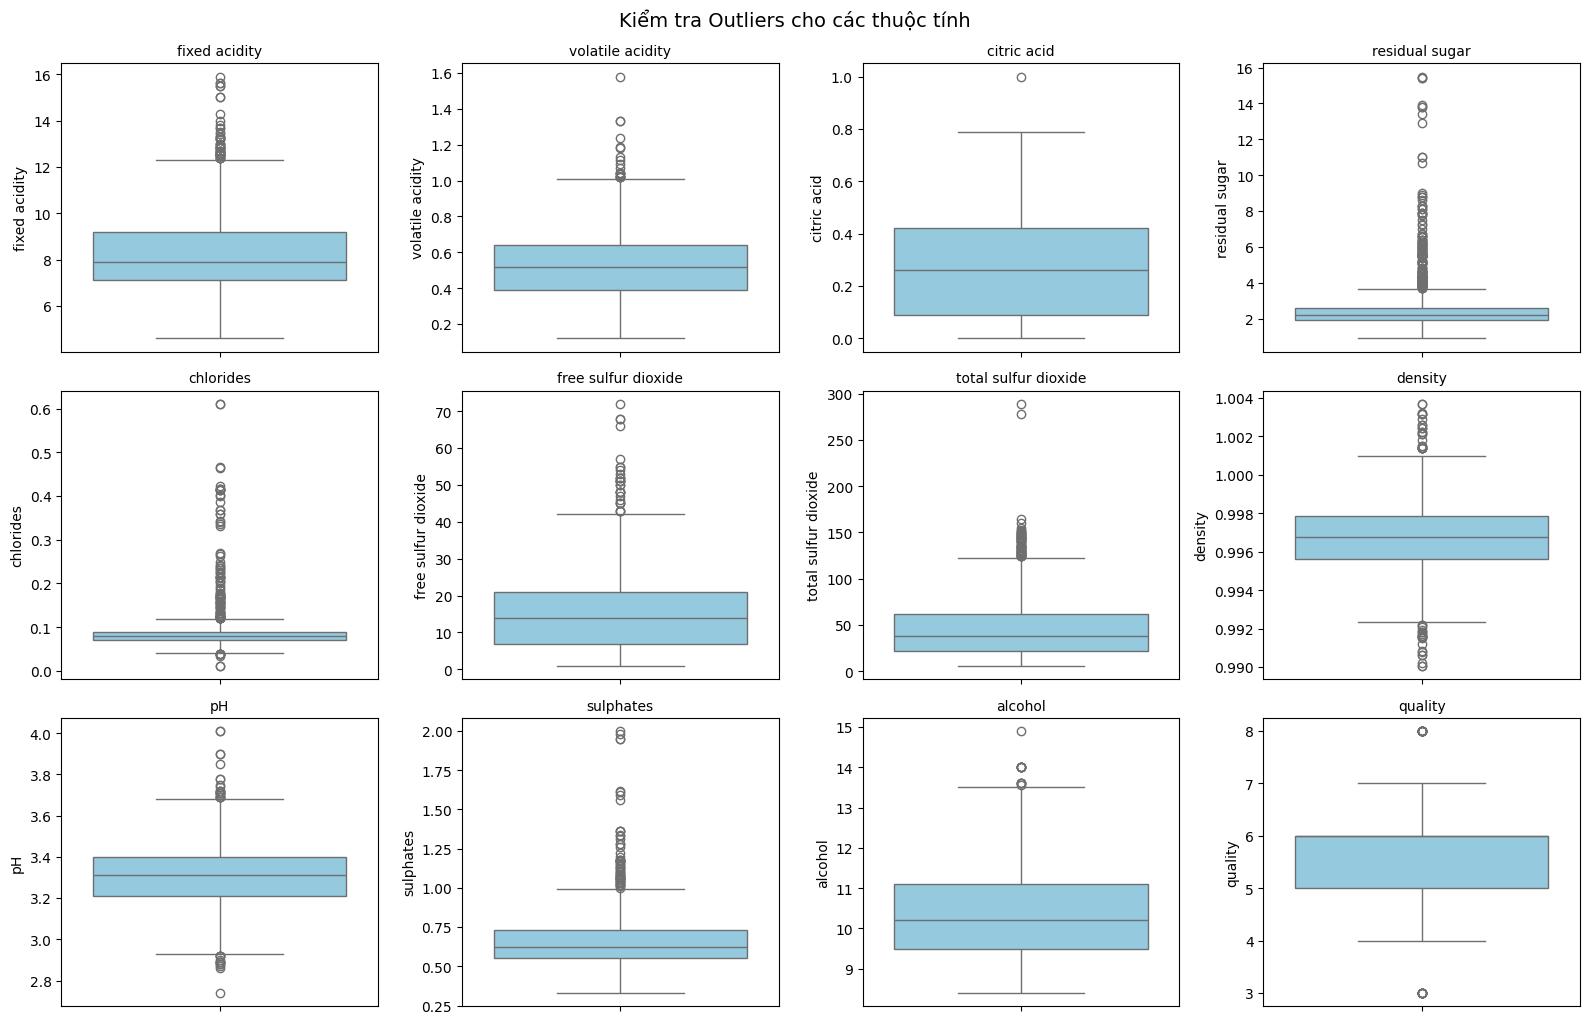

In [63]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 4, i+1)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'{col}', fontsize=10)
plt.tight_layout()
plt.suptitle('Kiểm tra Outliers cho các thuộc tính', fontsize=14, y=1.02)
plt.show()

### 3.5 Xử lí outlier

In [64]:
def get_iqr_bounds(df_train, cols):
    bounds = {}
    for col in cols:
        Q1 = df_train[col].quantile(0.25)
        Q3 = df_train[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        bounds[col] = (lower, upper)
    return bounds

def clip_outliers(df, bounds):
    df_clipped = df.copy()
    for col, (lower, upper) in bounds.items():
        df_clipped[col] = df_clipped[col].clip(lower=lower, upper=upper)
    return df_clipped

cols_to_process = X_train.columns
bounds = get_iqr_bounds(X_train, cols_to_process)

X_train_capped = clip_outliers(X_train, bounds)
X_test_capped = clip_outliers(X_test, bounds)

X_train = X_train_capped.copy()
X_test = X_test_capped.copy()

print("✓ Đã xử lý outlier và cập nhật X_train, X_test")
print(f"  Số mẫu train: {X_train.shape[0]}, Số mẫu test: {X_test.shape[0]}")

✓ Đã xử lý outlier và cập nhật X_train, X_test
  Số mẫu train: 1279, Số mẫu test: 320


#### Sau khi xử lí outlier

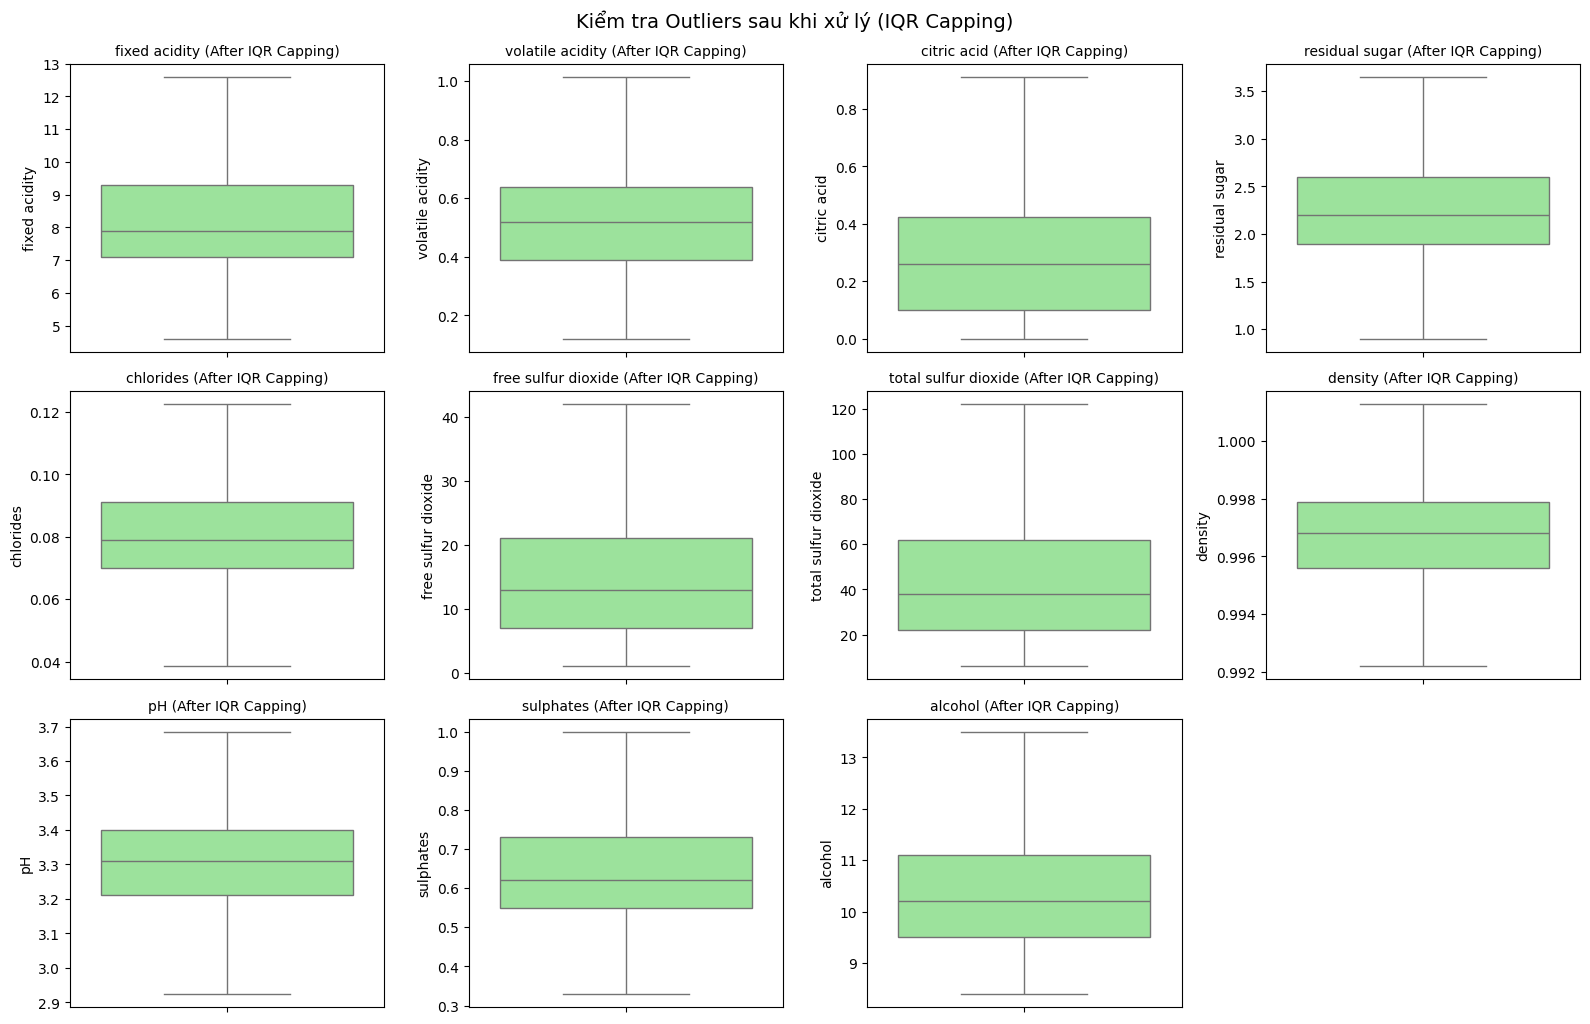


📊 So sánh trước và sau khi xử lý outlier:

fixed acidity:
  Trước: min=4.60, max=15.90
  Sau:   min=4.60, max=12.60

volatile acidity:
  Trước: min=0.12, max=1.58
  Sau:   min=0.12, max=1.02

citric acid:
  Trước: min=0.00, max=1.00
  Sau:   min=0.00, max=0.91

residual sugar:
  Trước: min=0.90, max=15.50
  Sau:   min=0.90, max=3.65

chlorides:
  Trước: min=0.01, max=0.61
  Sau:   min=0.04, max=0.12


In [65]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(X_train.columns):
    plt.subplot(3, 4, i+1)
    sns.boxplot(y=X_train[col], color='lightgreen')
    plt.title(f'{col} (After IQR Capping)', fontsize=10)
plt.tight_layout()
plt.suptitle('Kiểm tra Outliers sau khi xử lý (IQR Capping)', fontsize=14, y=1.02)
plt.show()

print("\n📊 So sánh trước và sau khi xử lý outlier:")
print("=" * 60)
for col in X_train.columns[:5]:
    original_min = df[col].min()
    original_max = df[col].max()
    capped_min = X_train[col].min()
    capped_max = X_train[col].max()
    print(f"\n{col}:")
    print(f"  Trước: min={original_min:.2f}, max={original_max:.2f}")
    print(f"  Sau:   min={capped_min:.2f}, max={capped_max:.2f}")


### 3.6 Chuẩn hóa dữ liệu (Standardization)

In [66]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [67]:
print("\n--- Trước khi SMOTE ---")
print(y_train.value_counts())

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
print("\n--- Sau khi SMOTE (Dữ liệu Train đã cân bằng) ---")
print(y_train_resampled.value_counts())


--- Trước khi SMOTE ---
quality_binary
0    1105
1     174
Name: count, dtype: int64

--- Sau khi SMOTE (Dữ liệu Train đã cân bằng) ---
quality_binary
0    1105
1    1105
Name: count, dtype: int64


## 4. Khám phá dữ liệu (Exploratory Data Analysis - EDA)

### 4.1 Phân phối biến mục tiêu (Quality Distribution)

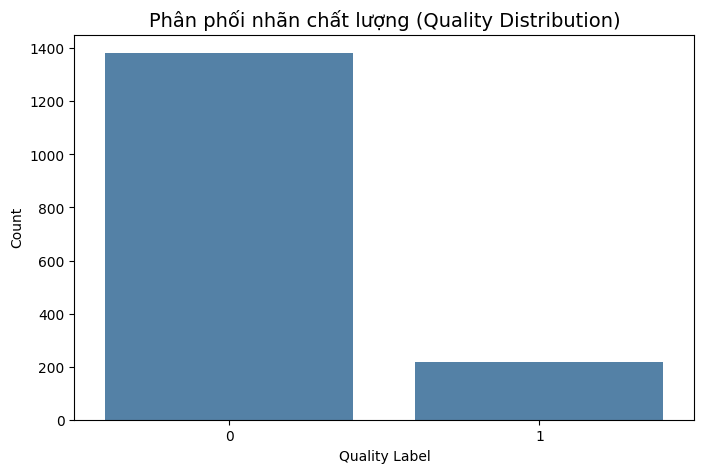

In [68]:
plt.figure(figsize=(8, 5))
sns.countplot(x='quality_binary', data=df, color='steelblue')
plt.title('Phân phối nhãn chất lượng (Quality Distribution)', fontsize=14)
plt.xlabel('Quality Label')
plt.ylabel('Count')
plt.show()

### 4.2 Ma trận tương quan (Correlation Heatmap)
Xem yếu tố nào ảnh hưởng mạnh đến Quality.

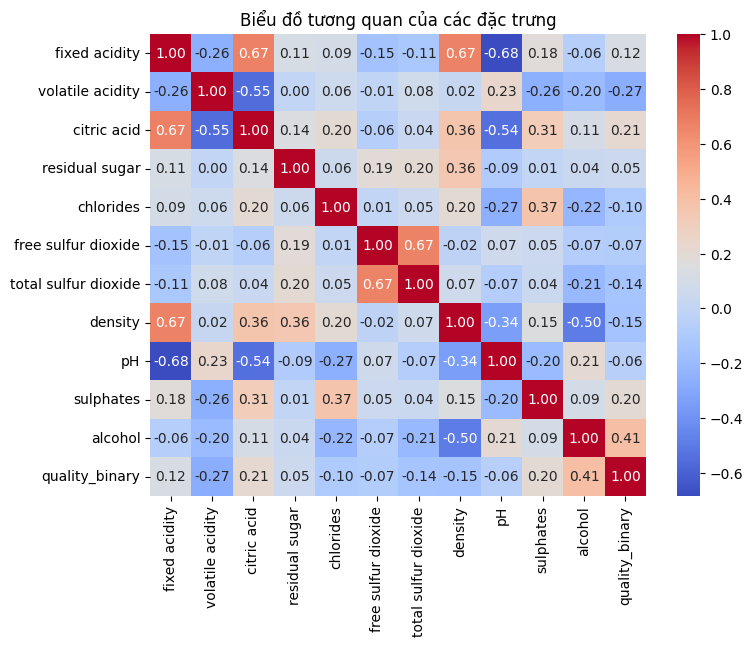

In [69]:
ma_tran_tuong_quan = df.drop('quality', axis=1).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(ma_tran_tuong_quan, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Biểu đồ tương quan của các đặc trưng")
plt.show()

### 4.3 Histogram - Phân phối từng thuộc tính

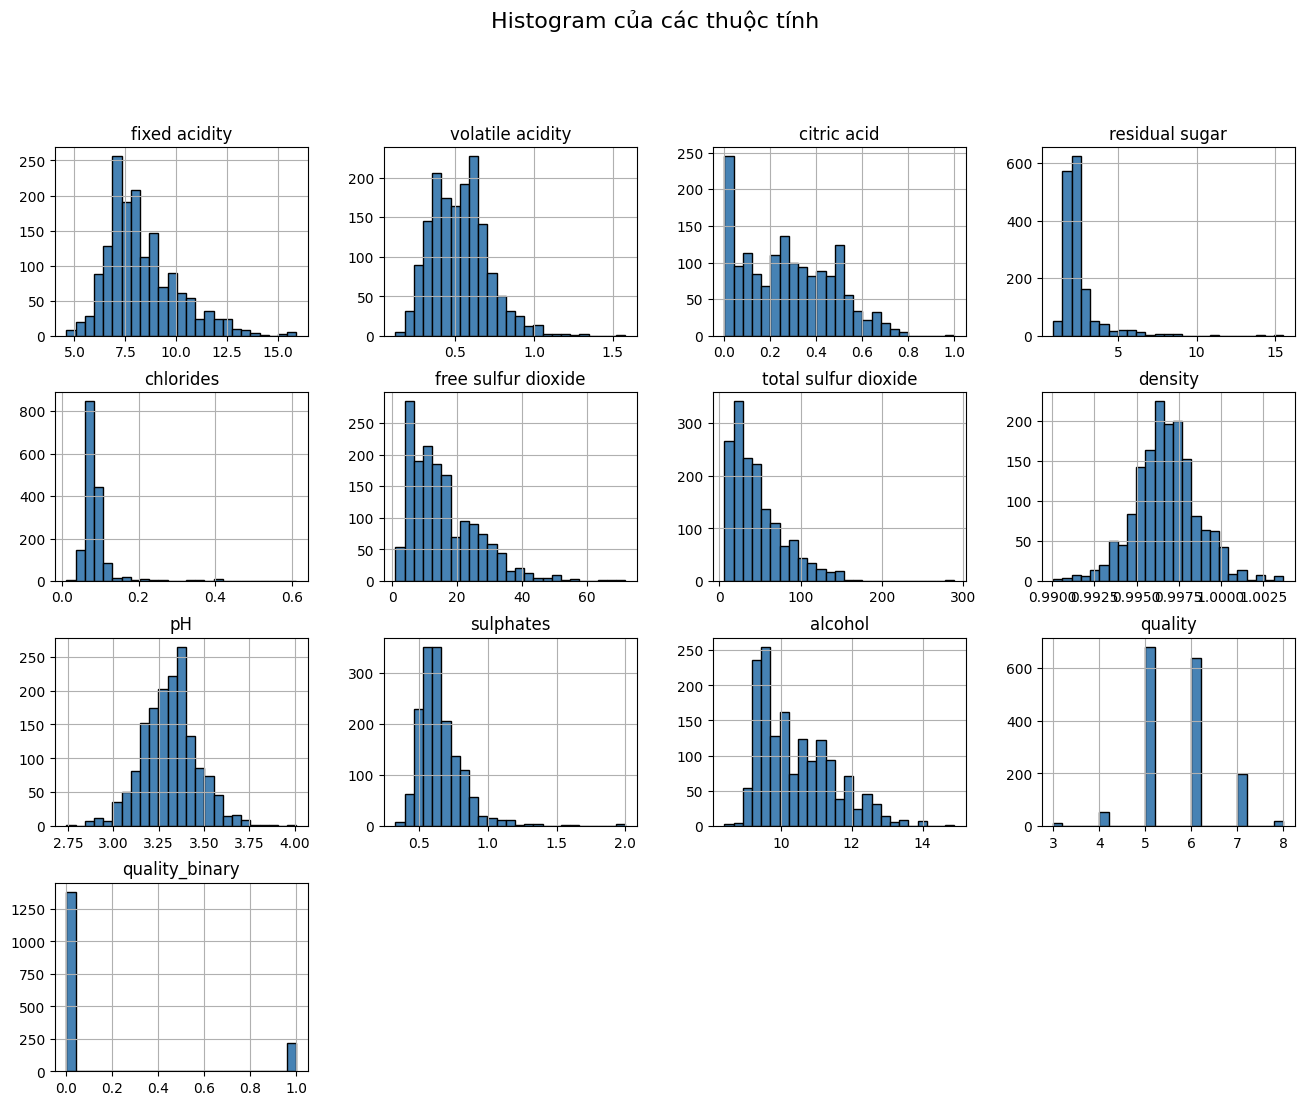

In [70]:
df.hist(figsize=(16, 12), bins=25, color='steelblue', edgecolor='black')
plt.suptitle('Histogram của các thuộc tính', fontsize=16, y=0.995)
plt.show()

### 4.4 Pairplot - Quan hệ giữa các biến quan trọng

<Figure size 1000x800 with 0 Axes>

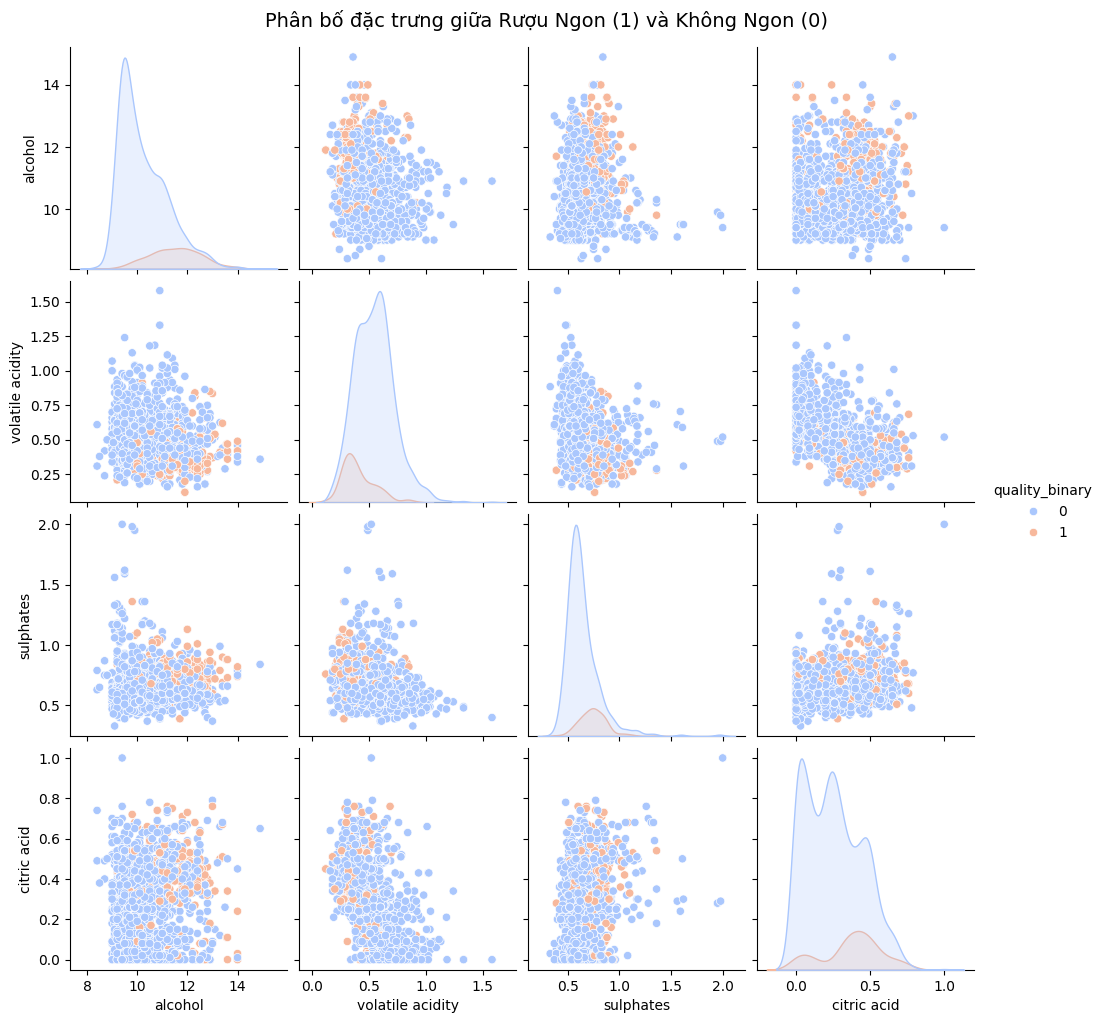

In [71]:
important_cols = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid', 'quality_binary']

plt.figure(figsize=(10, 8))
sns.pairplot(df[important_cols], hue='quality_binary', palette='coolwarm', diag_kind='kde')
plt.suptitle('Phân bố đặc trưng giữa Rượu Ngon (1) và Không Ngon (0)', y=1.02, fontsize=14)
plt.show()

## 5. Xây dựng mô hình (Modeling) & Tối ưu hóa (Hyperparameter Tuning)

In [72]:
best_models = {}
grid_results = {}

### 5.1 KNN (K-Nearest Neighbors)
Tham số quan trọng:
- **n_neighbors (K):** Số láng giềng gần nhất (thử 3→15).
- **weights:** uniform (trọng số bằng nhau) hoặc distance (gần hơn = quan trọng hơn).
- **metric:** Khoảng cách Euclidean hoặc Manhattan.

In [73]:
print("=" * 60)
print("Training KNN with GridSearchCV (on Resampled Data)...")
print("=" * 60)

knn_params = {
    'n_neighbors': list(range(3, 16, 2)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(
    KNeighborsClassifier(),
    knn_params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_knn.fit(X_train_resampled, y_train_resampled)

best_models['KNN'] = grid_knn.best_estimator_
print(f"\n✓ Best params: {grid_knn.best_params_}")
print(f"✓ Best CV accuracy: {grid_knn.best_score_:.4f}")

Training KNN with GridSearchCV (on Resampled Data)...
Fitting 5 folds for each of 28 candidates, totalling 140 fits

✓ Best params: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
✓ Best CV accuracy: 0.9163


### 5.2 SVM (Support Vector Machine)
Tham số quan trọng:
- **C:** Điều chỉnh overfitting (C lớn = fit data chặt hơn).
- **gamma:** Độ cong của decision boundary (gamma lớn = phức tạp hơn).
- **kernel:** Hàm nhân (linear cho dữ liệu tuyến tính, rbf cho phi tuyến).

In [74]:
print("\n" + "=" * 60)
print("Training SVM with GridSearchCV (on Resampled Data)...")
print("=" * 60)

svm_params = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

grid_svm = GridSearchCV(
    SVC(probability=True, random_state=42),
    svm_params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_svm.fit(X_train_resampled, y_train_resampled)

best_models['SVM'] = grid_svm.best_estimator_
print(f"\n✓ Best params: {grid_svm.best_params_}")
print(f"✓ Best CV accuracy: {grid_svm.best_score_:.4f}")


Training SVM with GridSearchCV (on Resampled Data)...
Fitting 5 folds for each of 32 candidates, totalling 160 fits

✓ Best params: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
✓ Best CV accuracy: 0.9760


### 5.3 Random Forest
Tham số quan trọng:
- **n_estimators:** Số cây trong rừng (nhiều hơn = tốt hơn nhưng chậm hơn).
- **max_depth:** Độ sâu tối đa của cây (None = không giới hạn).
- **criterion:** Cách đo độ tạp (gini hoặc entropy).

In [75]:
print("\n" + "=" * 60)
print("Training Random Forest with GridSearchCV (on Resampled Data)...")
print("=" * 60)

rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_rf.fit(X_train_resampled, y_train_resampled)

best_models['Random Forest'] = grid_rf.best_estimator_
print(f"\n✓ Best params: {grid_rf.best_params_}")
print(f"✓ Best CV accuracy: {grid_rf.best_score_:.4f}")


Training Random Forest with GridSearchCV (on Resampled Data)...
Fitting 5 folds for each of 36 candidates, totalling 180 fits

✓ Best params: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
✓ Best CV accuracy: 0.9430


## 6. Đánh giá mô hình (Model Evaluation)
Đánh giá toàn diện các mô hình trên tập Test.

### 6.1 Bảng so sánh hiệu năng (Comparison Table)


ĐÁNH GIÁ MÔ HÌNH TRÊN TẬP TEST THỰC TẾ (WineQT.csv)


,Model,Test Accuracy,Precision (Good),Recall (Good),F1-Score (Good)
0,KNN,0.8656,0.5000,0.7907,0.6126
1,SVM,0.9156,0.8077,0.4884,0.6087
2,Random Forest,0.9187,0.6889,0.7209,0.7045



CONFUSION MATRIX - SO SÁNH 3 MÔ HÌNH


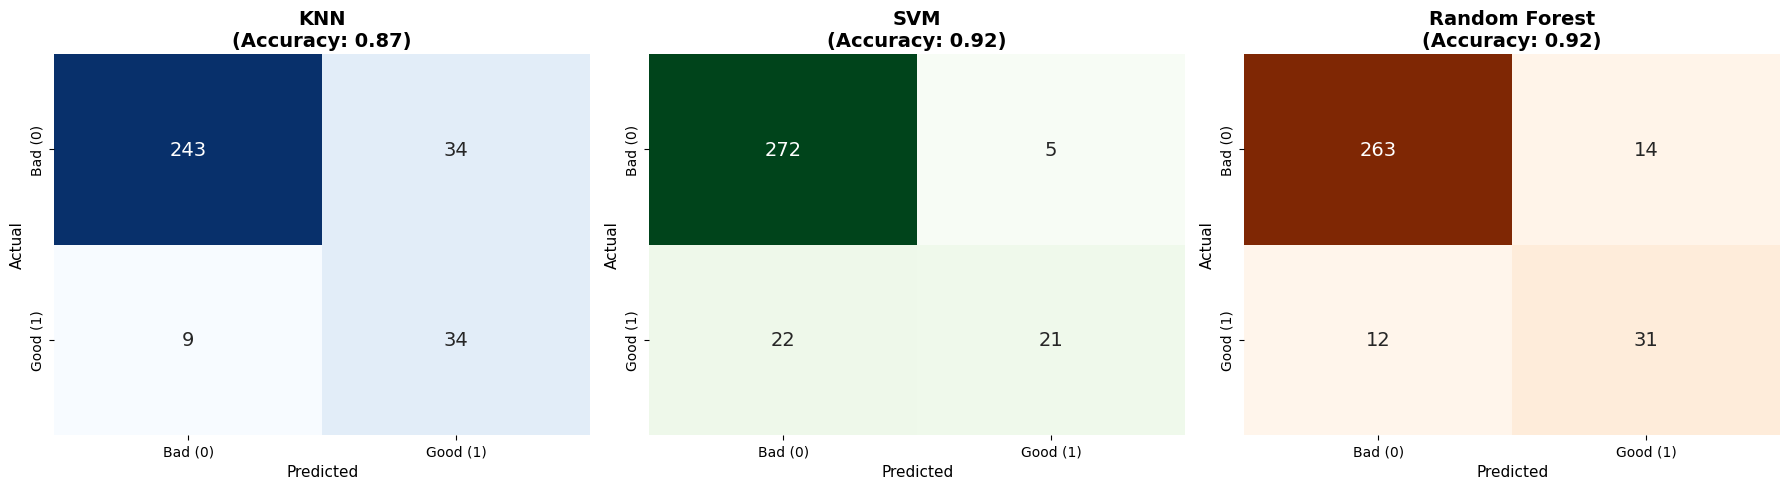


CHI TIẾT BÁO CÁO PHÂN LOẠI (CLASSIFICATION REPORT)

Model: KNN
              precision    recall  f1-score   support

     Bad (0)       0.96      0.88      0.92       277
    Good (1)       0.50      0.79      0.61        43

    accuracy                           0.87       320
   macro avg       0.73      0.83      0.77       320
weighted avg       0.90      0.87      0.88       320


Model: SVM
              precision    recall  f1-score   support

     Bad (0)       0.93      0.98      0.95       277
    Good (1)       0.81      0.49      0.61        43

    accuracy                           0.92       320
   macro avg       0.87      0.74      0.78       320
weighted avg       0.91      0.92      0.91       320


Model: Random Forest
              precision    recall  f1-score   support

     Bad (0)       0.96      0.95      0.95       277
    Good (1)       0.69      0.72      0.70        43

    accuracy                           0.92       320
   macro avg       0.82      0

In [76]:
print("\n" + "=" * 80)
print("ĐÁNH GIÁ MÔ HÌNH TRÊN TẬP TEST THỰC TẾ (WineQT.csv)")
print("=" * 80)

results = []

for name, model in best_models.items():
    y_pred = model.predict(X_test_scaled)
    
    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='binary', zero_division=0)
    rec  = recall_score(y_test, y_pred, average='binary', zero_division=0)
    f1   = f1_score(y_test, y_pred, average='binary', zero_division=0)

    results.append({
        'Model': name,
        'Test Accuracy': f"{acc:.4f}",
        'Precision (Good)': f"{prec:.4f}",
        'Recall (Good)': f"{rec:.4f}",
        'F1-Score (Good)': f"{f1:.4f}",
    })

results_df = pd.DataFrame(results)
display(results_df)

print("\n" + "=" * 80)
print("CONFUSION MATRIX - SO SÁNH 3 MÔ HÌNH")
print("=" * 80)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
colors = ['Blues', 'Greens', 'Oranges']
labels = ['Bad (0)', 'Good (1)']

for idx, (name, model) in enumerate(best_models.items()):
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(
        cm, annot=True, fmt='d',
        cmap=colors[idx], ax=axes[idx],
        xticklabels=labels, yticklabels=labels,
        cbar=False, annot_kws={"size": 14}
    )

    axes[idx].set_title(f'{name}\n(Accuracy: {accuracy_score(y_test, y_pred):.2f})', fontsize=14, weight='bold')
    axes[idx].set_xlabel('Predicted', fontsize=11)
    axes[idx].set_ylabel('Actual', fontsize=11)

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("CHI TIẾT BÁO CÁO PHÂN LOẠI (CLASSIFICATION REPORT)")
print("=" * 80)
for name, model in best_models.items():
    print(f"\nModel: {name}")
    y_pred = model.predict(X_test_scaled)
    print(classification_report(y_test, y_pred, target_names=['Bad (0)', 'Good (1)']))

### 6.2 Confusion Matrix cho tất cả các mô hình


CONFUSION MATRIX - SO SÁNH 3 MÔ HÌNH (BINARY CLASSIFICATION)


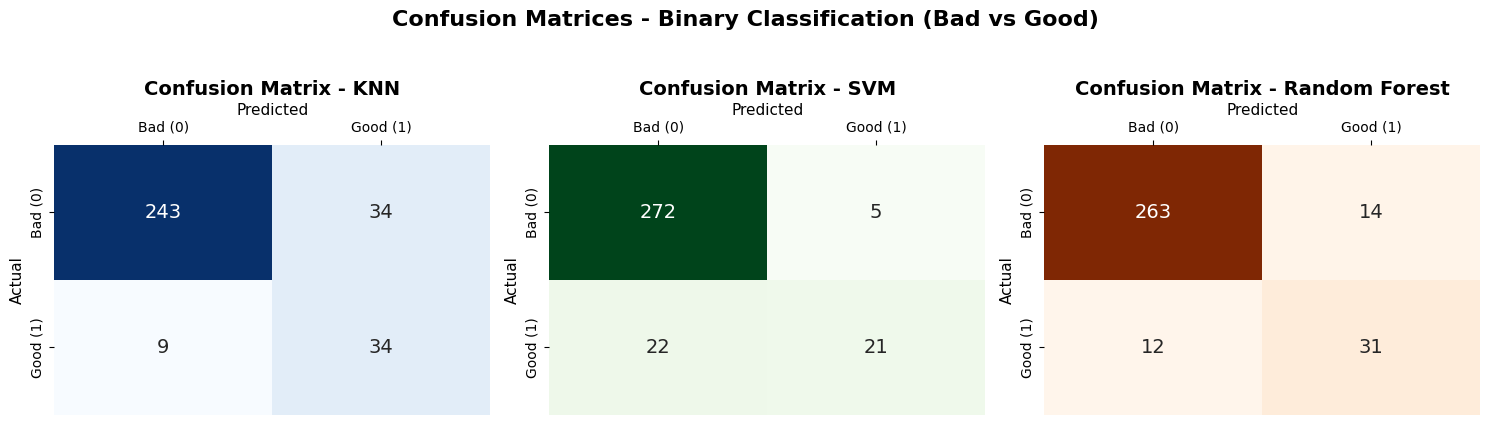


📊 Nhận xét:
  • Diagonal values (chéo chính) = dự đoán đúng
  • Off-diagonal values = dự đoán sai
  • Model tốt sẽ có giá trị cao trên đường chéo chính


In [77]:
print("\n" + "=" * 80)
print("CONFUSION MATRIX - SO SÁNH 3 MÔ HÌNH (BINARY CLASSIFICATION)")
print("=" * 80)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
colors = ['Blues', 'Greens', 'Oranges']
labels = ['Bad (0)', 'Good (1)']

for idx, (name, model) in enumerate(best_models.items()):
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(
        cm, annot=True, fmt='d',
        cmap=colors[idx], ax=axes[idx],
        xticklabels=labels, yticklabels=labels,
        cbar=False, annot_kws={"size": 14}
    )

    axes[idx].set_title(f'Confusion Matrix - {name}', fontsize=14, weight='bold')
    axes[idx].set_xlabel('Predicted', fontsize=11)
    axes[idx].xaxis.set_label_position('top')
    axes[idx].xaxis.tick_top()
    axes[idx].set_ylabel('Actual', fontsize=11)

plt.suptitle(
    'Confusion Matrices - Binary Classification (Bad vs Good)',
    fontsize=16, y=1.05, weight='bold'
)
plt.tight_layout()
plt.show()

print("\n📊 Nhận xét:")
print("  • Diagonal values (chéo chính) = dự đoán đúng")
print("  • Off-diagonal values = dự đoán sai")
print("  • Model tốt sẽ có giá trị cao trên đường chéo chính")

### 6.3 Classification Report (Đánh giá chi tiết)
Xem xét các chỉ số Precision, Recall, F1-Score cho bài toán phân loại nhị phân (0 vs 1).

In [78]:
print("\n" + "=" * 60)
print("CHI TIẾT ĐÁNH GIÁ (CLASSIFICATION REPORT)")
print("=" * 60)

for name, model in best_models.items():
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    
    print(f"\n🔹 Model: {name}")
    print(f"   Accuracy: {acc:.4f}")
    
    print("-" * 60)
    print(classification_report(y_test, y_pred, target_names=['Bad (0)', 'Good (1)']))
    print("=" * 60)


CHI TIẾT ĐÁNH GIÁ (CLASSIFICATION REPORT)

🔹 Model: KNN
   Accuracy: 0.8656
------------------------------------------------------------
              precision    recall  f1-score   support

     Bad (0)       0.96      0.88      0.92       277
    Good (1)       0.50      0.79      0.61        43

    accuracy                           0.87       320
   macro avg       0.73      0.83      0.77       320
weighted avg       0.90      0.87      0.88       320


🔹 Model: SVM
   Accuracy: 0.9156
------------------------------------------------------------
              precision    recall  f1-score   support

     Bad (0)       0.93      0.98      0.95       277
    Good (1)       0.81      0.49      0.61        43

    accuracy                           0.92       320
   macro avg       0.87      0.74      0.78       320
weighted avg       0.91      0.92      0.91       320


🔹 Model: Random Forest
   Accuracy: 0.9187
------------------------------------------------------------
        

## 7. Phân tích Feature Importance (Random Forest)
Xem yếu tố nào ảnh hưởng quan trọng nhất đến chất lượng rượu.


TOP 5 ĐẶC TRƯNG QUAN TRỌNG NHẤT (FEATURE IMPORTANCE)


,Feature,Importance,Cumulative %
10,alcohol,0.258346,25.834624
9,sulphates,0.139348,39.769451
1,volatile acidity,0.108859,50.655342
2,citric acid,0.082428,58.898144
6,total sulfur dioxide,0.075162,66.414326


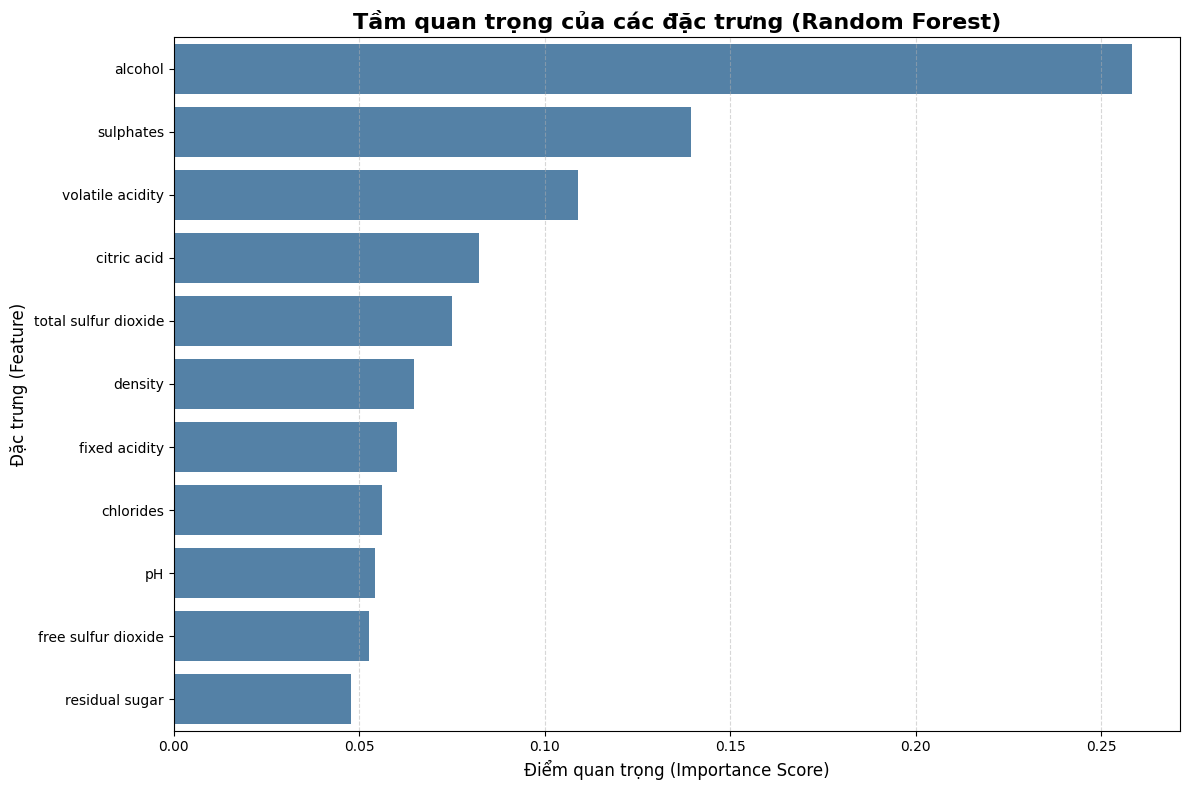

In [79]:
feature_names = X_train.columns.tolist()
rf_model = best_models['Random Forest']
importances = rf_model.feature_importances_

feature_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\n" + "=" * 60)
print("TOP 5 ĐẶC TRƯNG QUAN TRỌNG NHẤT (FEATURE IMPORTANCE)")
print("=" * 60)
feature_imp_df['Cumulative %'] = feature_imp_df['Importance'].cumsum() * 100
display(feature_imp_df.head(5))

plt.figure(figsize=(12, 8))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_imp_df,
    color='steelblue'
)

plt.title('Tầm quan trọng của các đặc trưng (Random Forest)', fontsize=16, weight='bold')
plt.xlabel('Điểm quan trọng (Importance Score)', fontsize=12)
plt.ylabel('Đặc trưng (Feature)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## 8.Đường cong ROC (Receiver Operating Characteristic Curve)

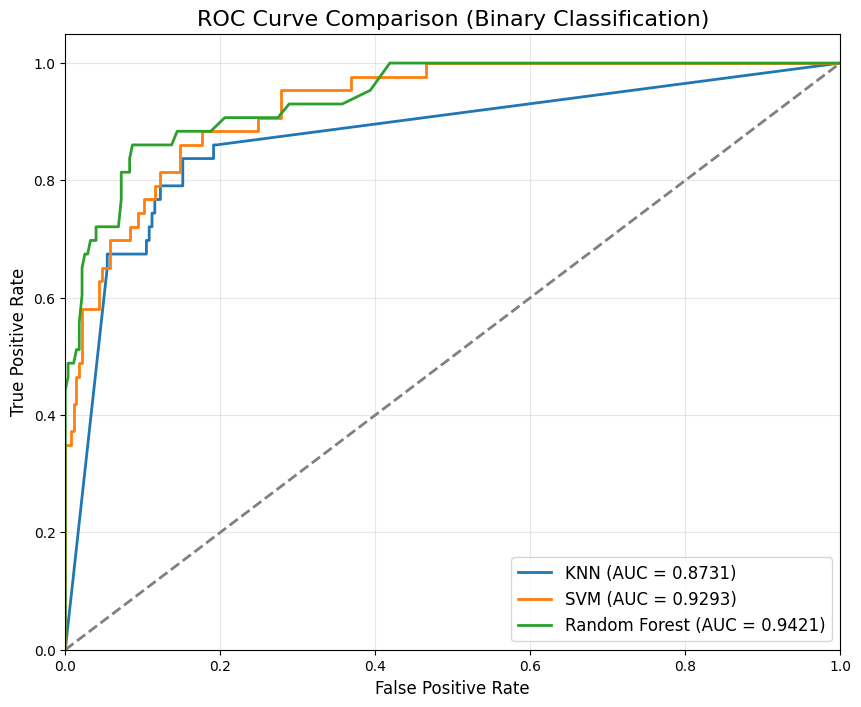

In [80]:
plt.figure(figsize=(10, 8))

for name, model in best_models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        print(f"Mô hình {name} không hỗ trợ predict_proba")
        continue
    
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve Comparison (Binary Classification)', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

## 9. Lưu mô hình (Save Models)

In [ ]:
os.makedirs('models', exist_ok=True)
joblib.dump(scaler, 'models/scaler.pkl')
joblib.dump(bounds, 'models/outlier_bounds.pkl')
joblib.dump(best_models['KNN'], 'models/knn.pkl')
joblib.dump(best_models['SVM'], 'models/svm.pkl')
joblib.dump(best_models['Random Forest'], 'models/rf.pkl')
print("✓ Đã lưu scaler, bounds và các mô hình vào thư mục 'models/'")


['models/rf.pkl']